In [ ]:
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
label = "airplane automobile bird cat	deer dog frog	horse	ship	truck"
label = label.split()
label

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

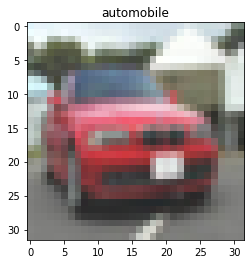

In [ ]:
import random
import matplotlib.pyplot as plt
i = random.randint(0,49999)
plt.imshow(x_train[i],cmap='gray') # Color map
plt.title(label[y_train[i][0]])
plt.show()

In [ ]:
x_train=x_train/255
x_test = x_test/255

In [ ]:
  x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(Conv2D(32,(3,3),strides=(2, 2),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),strides=(2, 2),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten()) # 784
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [ ]:
  #cnn1.summary()

In [ ]:
from keras import optimizers
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 14s 10ms/step - loss: 1.9375 - accuracy: 0.2732 - val_loss: 1.8011 - val_accuracy: 0.3282
Epoch 2/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.7803 - accuracy: 0.3460 - val_loss: 1.7013 - val_accuracy: 0.3800
Epoch 3/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.7272 - accuracy: 0.3693 - val_loss: 1.6774 - val_accuracy: 0.3844
Epoch 4/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.7035 - accuracy: 0.3780 - val_loss: 1.7271 - val_accuracy: 0.3697
Epoch 5/20
1250/1250 [==============================] - 13s 10ms/step - loss: 1.6815 - accuracy: 0.3892 - val_loss: 1.6877 - val_accuracy: 0.3793
Epoch 6/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.6647 - accuracy: 0.3974 - val_loss: 1.6921 - val_accuracy: 0.3824
Epoch 7/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.6455 - accuracy: 0.4042 - val_loss: 1.6739 -

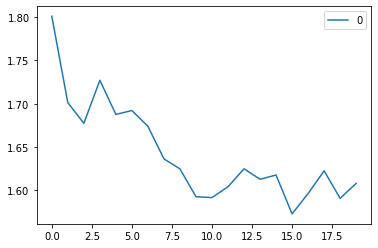

In [ ]:
import pandas as pd
loss = pd.DataFrame(model.history.history['val_loss']).plot()

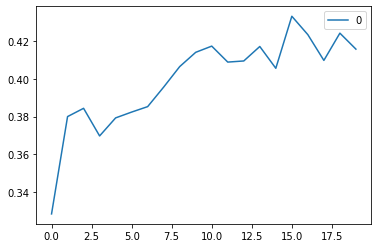

In [ ]:
acc = pd.DataFrame(model.history.history['val_accuracy']).plot()

In [ ]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([9, 9, 9, ..., 9, 9, 9])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.1067

In [ ]:
confusion_matrix(y_pred,y_test)

array([[  2,   2,   1,   3,   1,   1,   2,   3,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 40, 137, 117, 186, 146, 202, 124, 182,  52,  81],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [958, 861, 881, 811, 853, 796, 874, 815, 948, 919]])

In [ ]:
import pickle 
pickle.dump(label,open('img_model.p','wb'))

In [ ]:
model=pickle.load(open('img_model.p','rb'))

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
!pip install streamlit-drawable-canvas --quiet
from pyngrok import ngrok

     |████████████████████████████████| 6.6 MB 4.9 MB/s 
     |████████████████████████████████| 111 kB 43.9 MB/s 
     |████████████████████████████████| 170 kB 44.8 MB/s 
     |████████████████████████████████| 75 kB 3.0 MB/s 
     |████████████████████████████████| 4.2 MB 44.5 MB/s 
     |████████████████████████████████| 122 kB 61.9 MB/s 
     |████████████████████████████████| 786 kB 45.1 MB/s 
     |████████████████████████████████| 368 kB 43.2 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.19 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.0.3 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.25.0 which is incompatibl

In [ ]:
# Deployment 
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding',False)
st.title('Image classifier')
st.text('upload the image')

model=pickle.load(open('img_model.p','rb'))

uploaded_file=st.file_uploader("choose an image",type='jpg')
if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption='uploaded Image')

  if st.button('predict'):
    label = "airplane automobile bird cat	deer dog frog	horse	ship	truck"
    st.write('Result..')
    flat_data=[]
    img=np.array(img)
    img_resized=resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    

    pred=model.predict(flat_data)
    pred=label[pred[0]]
    st.title(f'predicted output:{pred}')
    a=model.predict_proba(flat_data)
    for index,item in enumerate(label):
      st.write(f'{item} : {a[0][index]*100}%')



Writing app.py


In [ ]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://3369ab581575.ngrok.io'